# U.S. Airline Traffic Cluster classification
In this project i will analyze the U.S. Airline Traffic data from 2013 to 2023 to see if there is any pattern in the data. I will use kmeans to identify the clusters.

**U.S. Airline Traffic Data (2003-2023)**

Variables

'Dom_Pax': Domestic Air Travel Passengers


'Int_Pax': International Air Travel Passengers


'Pax'    : Total Air Travel Passengers


'Dom_Flt': Number of Flights (Domestic)


'Int_Flt': Number of Flights (International)


'Flt'    : Number of Flights (Total)


'Dom_RPM': Revenue Passenger-miles (Domestic)


'Int_RPM': Revenue Passenger-miles (International)


'RPM'    : Revenue Passenger-miles (Total)


'Dom_ASM': Available Seat-miles (Domestic)


'Int_ASM': Available Seat-miles (International)


'ASM'    : Available Seat-miles (Total) 


'Dom_LF' : Load Factor (Domestic)


'Int_LF' : Load Factor (International)


'LF'     : Load Factor (Total)

In [156]:
# Import standard operational packages.
import pandas as pd
import numpy as np
import warnings
import math
warnings.filterwarnings("ignore")

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
#load the data and sort values by year and month
data = pd.read_csv(r"C:\Users\ponce\Desktop\Data Sc\Projects\Air line\air traffic.csv")
data = data.sort_values(by=["Year","Month"]).reset_index(drop=True)
data.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [159]:
#Convert object type to numeric
columns_to_convert = ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt',
                      'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM']

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col].replace(',','', regex=True),errors='coerce')


In [160]:
#Drop columns that do not add much info to the model given the project goal. 
#The variables selected are the sum of international and national flights.  
#I selected the sum because I'm not looking  for any indecator related national or international flights. 

data = data[['Year','Month','Pax','Flt','RPM','ASM','LF']]

In [161]:
#Take a look at some basic statistic
data.describe()

,Year,Month,Pax,Flt,RPM,ASM,LF
count,249.000000,249.000000,2.490000e+02,249.000000,2.490000e+02,2.490000e+02,249.000000
mean,2012.879518,6.445783,6.260192e+07,771486.883534,6.875906e+07,8.545724e+07,79.286305
std,6.002817,3.442803,1.229211e+07,115686.728629,1.548875e+07,1.382385e+07,8.895700
min,2003.000000,1.000000,3.013899e+06,222280.000000,2.907889e+06,2.103050e+07,13.830000
25%,2008.000000,3.000000,5.766458e+07,727898.000000,6.182568e+07,7.919780e+07,76.940000
50%,2013.000000,6.000000,6.389913e+07,779011.000000,6.900519e+07,8.505191e+07,81.580000
75%,2018.000000,9.000000,6.944743e+07,848650.000000,7.803987e+07,9.255187e+07,84.070000
max,2023.000000,12.000000,8.781077e+07,964102.000000,1.036439e+08,1.173122e+08,89.140000


In [162]:
#In this cell i select the data until 2019 because the data from 2020 - 2021 will change everything because of covid.
#This leave room to do another analysis: How much the flight industry change during and after covid
data_until2019 = data.iloc[:204]

In [163]:
#let's create a column named "Quater"
data_until2019["Quater"] = data_until2019['Month'].apply(lambda x:  math.ceil(x/3))


In [164]:
#select variables for the cluster analysis

X_until2019 = data_until2019[['Pax','Flt','RPM','ASM','LF']]

In [165]:
#Scale the features 

X_until2019_scaled = StandardScaler().fit_transform(X_until2019)

In [166]:
# Fit K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2, 12)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.
    Args:
    num_clusters: (list of ints) - The different k values to try
    x_vals: (array) - The training data
    Returns:
    inertia: (list) - A list of inertia scores, one for each \
    value of k
    '''
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

In [167]:
print(kmeans_inertia(num_clusters, X_until2019_scaled))

[534.1280616208979, 396.7206099830095, 288.2577243520809, 222.8295717272829, 184.49060559133142, 155.94243510658202, 137.51036711492745, 118.5138214543523, 107.79302312096165, 99.19374383785679]


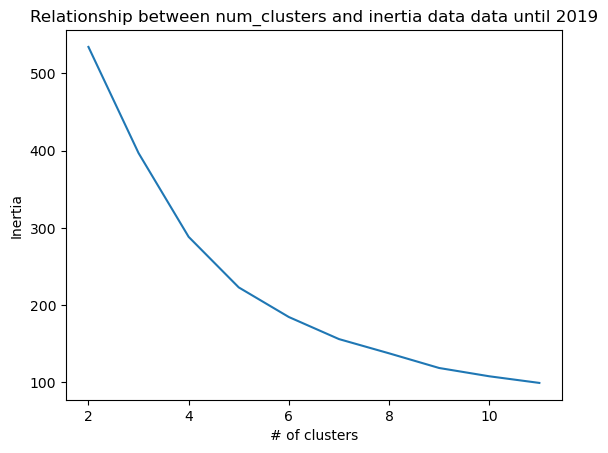

In [168]:
# Create a line plot to see the relationship between num_clusters and inertia data until 2019
sns.lineplot(x=num_clusters, y=kmeans_inertia(num_clusters, X_until2019_scaled))
plt.title("Relationship between num_clusters and inertia data data until 2019")
plt.xlabel("# of clusters")
plt.ylabel("Inertia");

In [169]:
# Evaluate silhouette score.
# Function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a silhouette_score model for different values of k.
    Calculates the Silhouette scores for each k value.
    Args:
    num_clusters: (list of ints) - The different k values to try
    x_vals: (array) - The training data
    Returns:
    inertia: (list) - A list of Silhouette scores one for each \
    value of k
    '''
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

In [170]:
print( kmeans_sil(num_clusters, X_until2019_scaled))

[0.3895531030776049, 0.3263468305467929, 0.37221100701403226, 0.36569093803735475, 0.3715173402451832, 0.3459631076930994, 0.3587846028448188, 0.3534890942374487, 0.3486687367990119, 0.3462324176758092]


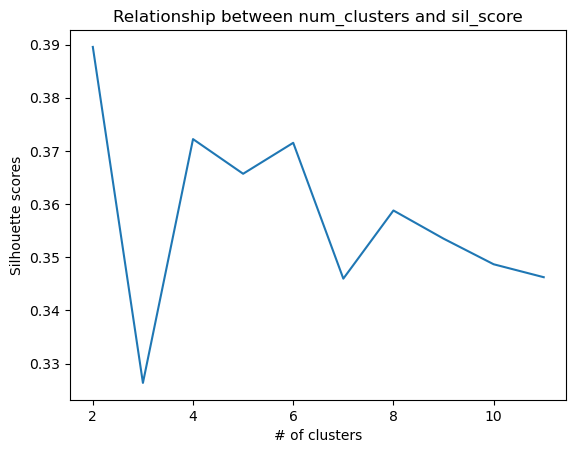

In [171]:
# Line plot for the "Relationship between num_clusters and sil_score
sns.lineplot(x=num_clusters, y=kmeans_sil(num_clusters, X_until2019_scaled))
plt.title("Relationship between num_clusters and sil_score")
plt.xlabel("# of clusters")
plt.ylabel("Silhouette scores");

This silhouette score graph indicate that the # of clusters should equal 4. An the inertia graph also indicated that 4 clusters is a good number of clusters, since after 4 clusters the inertia did not change that much.

In [172]:
#creating the model with 4 clusters
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(X_until2019_scaled)

KMeans(n_clusters=4, random_state=42)

In [173]:
#setting the cluster labels in the data in a new column named 'cluster'
data_until2019["cluster"] = kmeans4.labels_
data_until2019.head()


,Year,Month,Pax,Flt,RPM,ASM,LF,Quater,cluster
0,2003,1,47938280,842827,49097402,74159872,66.20,1,1
1,2003,2,45412146,741610,44863907,65676314,68.31,1,1
2,2003,3,55001313,856120,54341633,75346075,72.12,1,1
3,2003,4,51378704,821265,49836572,70168440,71.02,2,1
4,2003,5,53763186,844662,52576960,70979718,74.07,2,1


In [174]:
#let's see the value count for the clusters

data_until2019["cluster"].value_counts()

cluster
0    65
1    54
2    43
3    42
Name: count, dtype: int64

In [175]:
# Let's check the average of the numeric variables by clusters
data_until2019.groupby(['cluster']).agg({"RPM": "mean", "LF": "mean", "ASM": "mean", "Pax": "mean", "Flt": "mean"}).sort_values(by='RPM')

,RPM,LF,ASM,Pax,Flt
cluster,,,,,
1,5.809684e+07,74.805926,7.759631e+07,5.533621e+07,829952.407407
0,6.804186e+07,81.700923,8.324823e+07,6.143760e+07,745462.984615
2,7.275222e+07,83.310698,8.727777e+07,6.648029e+07,886282.093023
3,8.594817e+07,85.095476,1.009373e+08,7.510966e+07,790729.666667


We can verify that "RPM", "LF"	"ASM" and "Pax"	increase in this order, cluster 1, 0, 2, 3. That means that they have their min in the cluster 1 and their max in cluster 3. That's a clear pattern.

In [176]:
# Let's Verify if any `cluster` can be differentiated by `Quater'.
data_until2019.groupby(['cluster', 'Quater']).agg({"RPM": "mean", "LF": "mean", "ASM": "mean", "Pax": "mean"}).sort_values(by="RPM")

RPM         LF           ASM           Pax
cluster Quater                                                     
1       1       5.582984e+07  73.361818  7.606159e+07  5.273331e+07
        2       5.748643e+07  75.488333  7.607353e+07  5.696269e+07
        3       5.925243e+07  75.580000  7.834401e+07  5.530122e+07
        4       6.055750e+07  75.999444  7.964735e+07  5.799091e+07
0       1       6.724934e+07  80.521000  8.349192e+07  6.049316e+07
2       4       6.783130e+07  78.680000  8.621135e+07  6.394098e+07
0       4       6.785268e+07  82.179130  8.251928e+07  6.183222e+07
        3       6.876538e+07  82.030000  8.380456e+07  6.063213e+07
        2       6.907139e+07  82.412857  8.377976e+07  6.259878e+07
2       1       6.985066e+07  81.238000  8.597311e+07  6.581122e+07
        2       7.111486e+07  82.897059  8.575730e+07  6.544779e+07
        3       7.511541e+07  84.412000  8.894965e+07  6.765215e+07
3       4       8.239538e+07  83.420000  9.875670e+07  7.382087e+07
        1       8.363198e+07  84.405000  9.904158e+07  7.494142e+07
        2       8.567866e+07  85.427857  1.002386e+08  7.487563e+07
        3       8.894904e+07  85.974667  1.034033e+08  7.614622e+07

In mostly all clusters we got that the max of the variables is in the second of third quater.

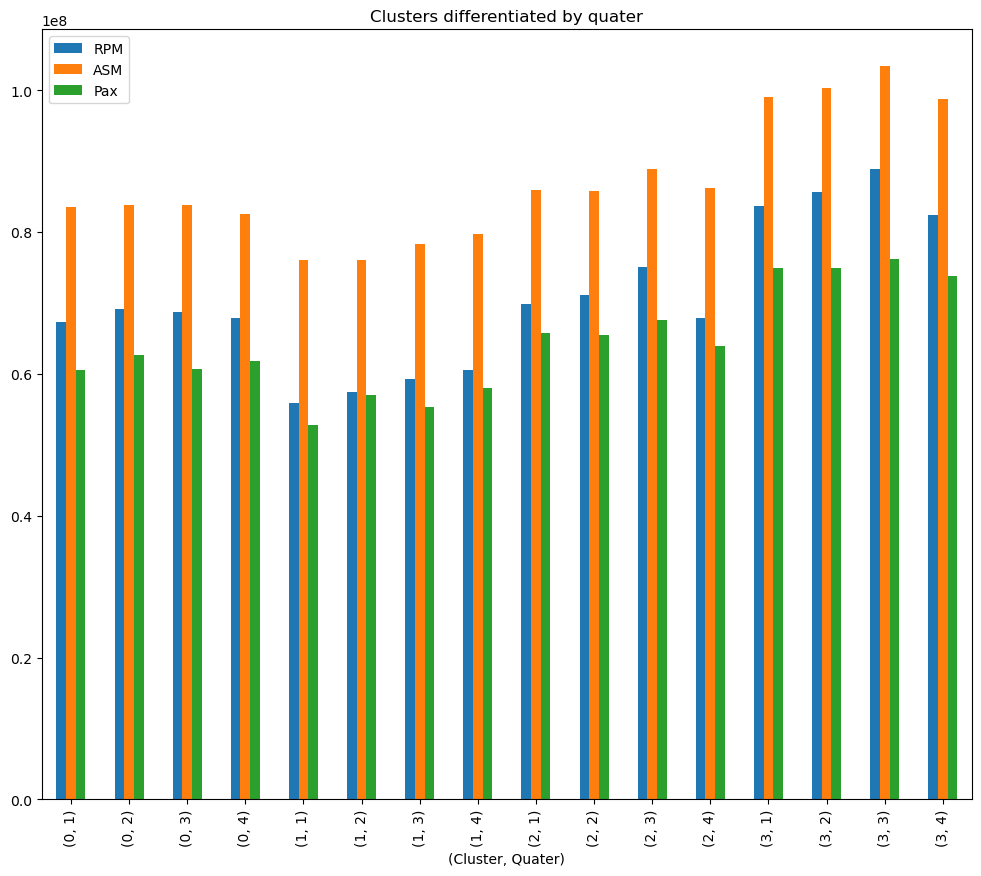

In [177]:
#Let's double-check this in a graph
data_until2019.groupby(by=['cluster', 'Quater']).agg({"RPM": "mean", "ASM": "mean", "Pax": "mean"}).plot.bar(title='Clusters differentiated by quater',
figsize=(12,10),xlabel='(Cluster, Quater)');


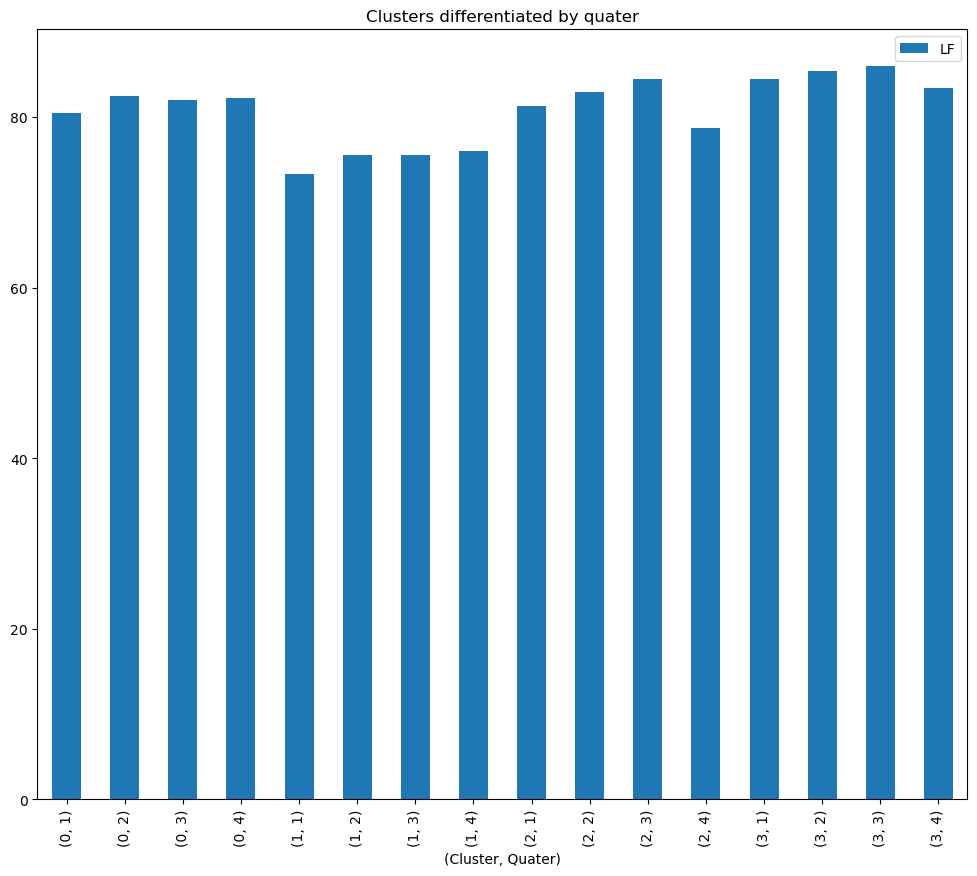

In [178]:
data_until2019.groupby(by=['cluster', 'Quater']).agg({"LF": "mean"}).plot.bar(title='Clusters differentiated by quater',
figsize=(12,10),xlabel='(Cluster, Quater)');


The graph verify what we observe with the numbers. There is a pattern that relates (cluster, quater) having the highest numbers at quater 2 and 3 of each cluster. And having "RPM", "LF" "ASM" and "Pax" increase in this order, cluster 1, 0, 2, 3. Hence the highest numbers are more likely to be in the cluster 3, quater 2 or 3.  

# Conclusion
The cluster have a pattern the "RPM", "LF" "ASM" and "Pax" increase in this order, cluster 1, 0, 2, 3. And also mostly each cluster have their max number in the 2 or 3 quater.

This set a pattern in the dataset that relates (cluster, quater). Where the "RPM", "LF" "ASM" and "Pax" variables tends to increase in the cluster 2 and 3, quaters 2 and 3.